In [14]:
import numpy as np
import pandas as pd


from utils.data import extract_eeg_data, multi_to_binary_classification, split_dataset, dict_to_arr
from utils.labels import get_stai_labels
from utils.valid_recs import get_valid_recs
from utils.metrics import compute_metrics

from classifiers import EEGNet_classification, EEGNet_SSVEP_classification, EEGNet_TSGL_classification, EEGNet_DeepConvNet_classification, EEGNet_ShallowConvNet_classification, TSGLEEGNet
import utils.variables as v


In [15]:
valid_recs = get_valid_recs(data_type='ica', output_type = 'np')
print(f'Valid recs {valid_recs}')

x_dict_ = extract_eeg_data(valid_recs, data_type='ica', output_type='np')


Filtering out invalid recordings



ERROR:root:1) Failed to read data for recording P006_S002_001
ERROR:root:1) Failed to read data for recording P006_S002_002


Data/ICA_data\sub-P010_ses-S001_run-001.mat not valid
Data/ICA_data\sub-P013_ses-S001_run-001.mat not valid
Data/ICA_data\sub-P013_ses-S001_run-002.mat not valid
Data/ICA_data\sub-P020_ses-S001_run-001.mat not valid
Data/ICA_data\sub-P023_ses-S002_run-002.mat not valid


ERROR:root:1) Failed to read data for recording P028_S001_001
ERROR:root:1) Failed to read data for recording P028_S001_002


Returning valid recordings

Valid recs ['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S001_001', 'P002_S001_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S001_001', 'P004_S001_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P005_S002_001', 'P005_S002_002', 'P006_S001_001', 'P006_S001_002', 'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S001_002', 'P008_S002_001', 'P008_S002_002', 'P009_S001_001', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 'P010_S001_002', 'P010_S002_001', 'P010_S002_002', 'P011_S001_001', 'P011_S001_002', 'P011_S002_001', 'P011_S002_002', 'P012_S001_001', 'P012_S001_002', 'P012_S002_001', 'P012_S002_002', 'P013_S002_001', 'P013_S002_002', 'P014_S001_001', 'P014_S001_002', 'P014_S002_001', 'P014_S002_002', 'P015_S001_001', 'P015_S001_002', 'P015_S002_001', 'P015_S002_002', 'P016_S001_001', 'P016_S0

In [16]:
y_dict_ = get_stai_labels(valid_recs) 
#y_dict = get_pss_labels(valid_recs)

    SubjectNo  D1Y1  D2Y1  J1Y1  J2Y1
0           1    26    30    29    31
1           2    38    41    26    34
2           3    58    56    36    35
3           4    40    45    24    24
4           5    25    31    38    37
5           6    49    58     0     0
6           7    56    50    28    28
7           8    46    37    23    27
8           9    41    47    27    22
9          10    37    20    23    21
10         11    50    49    31    47
11         12    42    47    47    41
12         13    35    35    28    33
13         14    54    35    26    26
14         15    51    55    33    42
15         16    35    38    42    45
16         17    37    35    24    20
17         18    54    62    41    48
18         19    47    52    30    36
19         20    46    38    24    25
20         21    44    54    33    39
21         22    49    51    28    34
22         23    56    53    33    28
23         24    52    58    36    41
24         25    48    62    29    56
25         2

In [18]:
print(f" Length of data after removing invalid labels: {len(x_dict_)}")
print(f" Lenght og labels after removing invalid labels: {len(y_dict_)}")

 Length of data after removing invalid labels: 103
 Lenght og labels after removing invalid labels: 103


In [19]:
x_dict, y_dict = multi_to_binary_classification(x_dict_, y_dict_)


The extracted keys : 
['P002_S001_001', 'P002_S001_002', 'P004_S001_001', 'P004_S001_002', 'P005_S002_001', 'P005_S002_002', 'P008_S001_002', 'P009_S001_001', 'P012_S001_001', 'P012_S002_002', 'P015_S002_002', 'P016_S001_002', 'P016_S002_001', 'P016_S002_002', 'P017_S001_001', 'P018_S002_001', 'P020_S001_002', 'P021_S001_001', 'P021_S002_002', 'P024_S002_002', 'P026_S001_001', 'P026_S001_002', 'P027_S001_002', 'P027_S002_001']

Dictionary after removal of keys from y_dict: 
 dict_keys(['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P006_S001_001', 'P006_S001_002', 'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S002_001', 'P008_S002_002', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 'P010_S001_002', 'P010_S002_001', 'P010_S002_002', 'P011_S001_001'

In [20]:
print(f" Length of data after removing mildly stressed subjects: {len(x_dict_)}")
print(f" Lenght og labels after removing  mildly stressed subjects: {len(y_dict_)}")

 Length of data after removing mildly stressed subjects: 79
 Lenght og labels after removing  mildly stressed subjects: 79


In [21]:
train_data_dict, test_data_dict, val_data_dict, train_labels_dict, test_labels_dict, val_labels_dict = split_dataset(x_dict, y_dict)

In [22]:
print(f"Length of train data set: {len(train_data_dict)}")
print(f"Length of validation data set: {len(val_data_dict)}")
print(f"Length of test data set: {len(test_data_dict)}")

Length of train data set: 44
Length of validation data set: 16
Length of test data set: 19


In [23]:
train_data = dict_to_arr(train_data_dict)
test_data = dict_to_arr(test_data_dict)
val_data = dict_to_arr(val_data_dict)

train_labels = np.reshape(np.array(list(train_labels_dict.values())), (len(train_data),1))
test_labels = np.reshape(np.array(list(test_labels_dict.values())), (len(test_data),1))
val_labels = np.reshape(np.array(list(val_labels_dict.values())), (len(val_data),1))

print(f"Shape of train data set: {train_data.shape}")
print(f"Shape of validation data set: {val_data.shape}")
print(f"Shape of test data set: {test_data.shape}")


print(f"Shape of train labels set: {train_labels.shape}")
print(f"Shape of validation labels set: {val_labels.shape}")
print(f"Shape of test labels set: {test_labels.shape}")

Shape of train data set: (44, 8, 75000)
Shape of validation data set: (16, 8, 75000)
Shape of test data set: (19, 8, 75000)
Shape of train labels set: (44, 1)
Shape of validation labels set: (16, 1)
Shape of test labels set: (19, 1)


In [42]:
probs_EEGNet = EEGNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels)

Epoch 1/300

Epoch 1: val_loss improved from inf to 0.71064, saving model to /tmp/checkpoint.h5
1/1 - 11s - loss: 0.9489 - accuracy: 0.4545 - val_loss: 0.7106 - val_accuracy: 0.3125 - 11s/epoch - 11s/step
Epoch 2/300

Epoch 2: val_loss did not improve from 0.71064
1/1 - 9s - loss: 0.5629 - accuracy: 0.6818 - val_loss: 0.7657 - val_accuracy: 0.3125 - 9s/epoch - 9s/step
Epoch 3/300

Epoch 3: val_loss did not improve from 0.71064
1/1 - 9s - loss: 0.3071 - accuracy: 0.8409 - val_loss: 0.7491 - val_accuracy: 0.3125 - 9s/epoch - 9s/step
Epoch 4/300

Epoch 4: val_loss did not improve from 0.71064
1/1 - 9s - loss: 0.1756 - accuracy: 0.9773 - val_loss: 0.7269 - val_accuracy: 0.3125 - 9s/epoch - 9s/step
Epoch 5/300

Epoch 5: val_loss did not improve from 0.71064
1/1 - 9s - loss: 0.1320 - accuracy: 1.0000 - val_loss: 0.7153 - val_accuracy: 0.3750 - 9s/epoch - 9s/step
Epoch 6/300

Epoch 6: val_loss did not improve from 0.71064
1/1 - 9s - loss: 0.1121 - accuracy: 1.0000 - val_loss: 0.7117 - val_acc

1/1 [==============================] - 0s 414ms/step
Classification accuracy: 0.562327 


In [45]:
# with init_filter data, 300 epochs, sigmoid
probs_EEGNet_init_sigmoid = np.array([
                  [0.7138277, 0.28617287],
                  [0.5637057, 0.43629473],
                  [0.6218500, 0.37815124],
                  [0.7166857, 0.28331438],
                  [0.6754987, 0.32450426],
                  [0.8090515, 0.19095036],
                  [0.5339635, 0.46603800],
                  [0.2460488, 0.75395140],
                  [0.4467932, 0.55320940],
                  [0.6290466, 0.37095330],
                  [0.5762418, 0.42375806],
                  [0.1861840, 0.81381420],
                  [0.6687245, 0.33127743],
                  [0.7082854, 0.29171503],
                  [0.5183024, 0.48169836],
                  [0.7217397, 0.27826140],
                  [0.6201925, 0.37980822],
                  [0.6769989, 0.32300153],
                  [0.4880893, 0.51191190]])


preds_EEGNet = probs_EEGNet.argmax(axis = -1)  
print(preds_EEGNet)
print(test_labels[:,0].T)

performance_EEGNet = compute_metrics(test_labels, preds_EEGNet)
print(performance_EEGNet)



[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
[1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0]

 Confusion matrix:
[[9 2]
 [8 0]]
[47.37 52.94  0.  ]


In [44]:
print(probs_EEGNet)


[[0.6622658  0.33773378]
 [0.6305761  0.3694238 ]
 [0.59458554 0.40541294]
 [0.58825123 0.41174808]
 [0.61485636 0.38514262]
 [0.6281727  0.37182656]
 [0.6707296  0.32926738]
 [0.7152163  0.28478536]
 [0.3621873  0.63781214]
 [0.56972075 0.43027884]
 [0.629088   0.37091017]
 [0.4353447  0.5646552 ]
 [0.56697416 0.43302345]
 [0.6457108  0.35428876]
 [0.6471834  0.35281634]
 [0.5027475  0.497253  ]
 [0.62844676 0.37155262]
 [0.57276446 0.42723358]
 [0.5813717  0.41862816]]


In [ ]:
#SSVEP IS TAKING TOO LONG

In [12]:
#probs_SSVEP = EEGNet_SSVEP_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels)

In [13]:
'''print(probs_SSVEP)
preds_SSVEP = probs_SSVEP.argmax(axis = -1)  
print(preds_SSVEP)
print(test_labels.T)

performance_SSVEP = compute_metrics(test_labels, preds_SSVEP)
print(performance_SSVEP)'''

'print(probs_SSVEP)\npreds_SSVEP = probs_SSVEP.argmax(axis = -1)  \nprint(preds_SSVEP)\nprint(test_labels.T)\n\nperformance_SSVEP = compute_metrics(test_labels, preds_SSVEP)\nprint(performance_SSVEP)'

Epoch 1/300

Epoch 1: val_loss improved from inf to 3.11173, saving model to /tmp\checkpoint.h5
2/2 - 16s - loss: 5.4610 - accuracy: 0.6364 - val_loss: 3.1117 - val_accuracy: 0.6875 - 16s/epoch - 8s/step
Epoch 2/300

Epoch 2: val_loss improved from 3.11173 to 2.49090, saving model to /tmp\checkpoint.h5
2/2 - 14s - loss: 4.6506 - accuracy: 0.9091 - val_loss: 2.4909 - val_accuracy: 0.6250 - 14s/epoch - 7s/step
Epoch 3/300

Epoch 3: val_loss improved from 2.49090 to 2.29405, saving model to /tmp\checkpoint.h5
2/2 - 14s - loss: 3.9703 - accuracy: 0.9773 - val_loss: 2.2941 - val_accuracy: 0.6875 - 14s/epoch - 7s/step
Epoch 4/300

Epoch 4: val_loss improved from 2.29405 to 2.02687, saving model to /tmp\checkpoint.h5
2/2 - 15s - loss: 3.6702 - accuracy: 1.0000 - val_loss: 2.0269 - val_accuracy: 0.6875 - 15s/epoch - 7s/step
Epoch 5/300

Epoch 5: val_loss improved from 2.02687 to 1.70249, saving model to /tmp\checkpoint.h5
2/2 - 15s - loss: 3.5965 - accuracy: 1.0000 - val_loss: 1.7025 - val_acc

c:\Users\annej\anaconda3\envs\MNE\lib\site-packages\pyriemann\utils\viz.py:24: RuntimeWarning: invalid value encountered in true_divide
  cm = 100 * cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


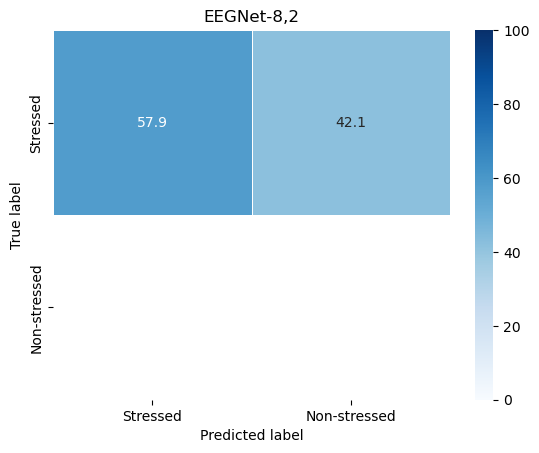

In [24]:
probs_TSGL = EEGNet_TSGL_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels)

In [25]:
print(probs_TSGL)
preds_TSGL = probs_TSGL.argmax(axis = -1)  
print(preds_TSGL)
print(test_labels[:,0].T)

performance_TSGL = compute_metrics(test_labels, preds_TSGL)
print(performance_TSGL)

[[0.64331865 0.3566838 ]
 [0.6146636  0.38533852]
 [0.58371186 0.41628984]
 [0.56707406 0.43292838]
 [0.6612734  0.33872905]
 [0.6875879  0.3124139 ]
 [0.607306   0.3926963 ]
 [0.60564953 0.39435235]
 [0.6652483  0.33475387]
 [0.64642864 0.35357326]
 [0.62921125 0.37079108]
 [0.6381108  0.36189175]
 [0.55244595 0.44755626]
 [0.6248526  0.37514943]
 [0.6027489  0.39725298]
 [0.6343474  0.36565548]
 [0.6637554  0.3362469 ]
 [0.61393946 0.38606283]
 [0.6709218  0.32907963]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0]

 Confusion matrix:
[[11  0]
 [ 8  0]]
Null error in specificity
[57.89 57.89  0.  ]


In [23]:
# with init data, 300 epochs, softmax
probs_TSGL_init = np.array([[0.34468523, 0.65531474],
                            [0.4223048,  0.5776952 ],
                            [0.66058546, 0.33941454],
                            [0.82226074, 0.1777392 ],
                            [0.85768410, 0.142316  ],
                            [0.79356056, 0.2064394 ],
                            [0.43697017, 0.5630298 ],
                            [0.23311326, 0.7668868 ],
                            [0.06507578, 0.93492424],
                            [0.48482734, 0.5151727 ],
                            [0.50462850, 0.49537155],
                            [0.68665516, 0.3133448 ],
                            [0.46980935, 0.5301907 ],
                            [0.55152243, 0.4484776 ],
                            [0.11421819, 0.8857818 ],
                            [0.25776443, 0.74223554],
                            [0.45055872, 0.5494413 ],
                            [0.75034060, 0.24965943],
                            [0.59446220, 0.40553778]])

Epoch 1/300

Epoch 1: val_loss improved from inf to 26.70509, saving model to /tmp\checkpoint.h5
2/2 - 18s - loss: 2.2621 - accuracy: 0.6136 - val_loss: 26.7051 - val_accuracy: 0.3125 - 18s/epoch - 9s/step
Epoch 2/300

Epoch 2: val_loss improved from 26.70509 to 3.67555, saving model to /tmp\checkpoint.h5
2/2 - 16s - loss: 58.2839 - accuracy: 0.4318 - val_loss: 3.6756 - val_accuracy: 0.6875 - 16s/epoch - 8s/step
Epoch 3/300

Epoch 3: val_loss improved from 3.67555 to 1.50265, saving model to /tmp\checkpoint.h5
2/2 - 15s - loss: 26.4931 - accuracy: 0.5682 - val_loss: 1.5026 - val_accuracy: 0.3750 - 15s/epoch - 8s/step
Epoch 4/300

Epoch 4: val_loss did not improve from 1.50265
2/2 - 16s - loss: 2.3248 - accuracy: 0.8636 - val_loss: 3.3243 - val_accuracy: 0.7500 - 16s/epoch - 8s/step
Epoch 5/300

Epoch 5: val_loss did not improve from 1.50265
2/2 - 15s - loss: 5.0684 - accuracy: 0.7727 - val_loss: 8.1943 - val_accuracy: 0.5625 - 15s/epoch - 8s/step
Epoch 6/300

Epoch 6: val_loss improved

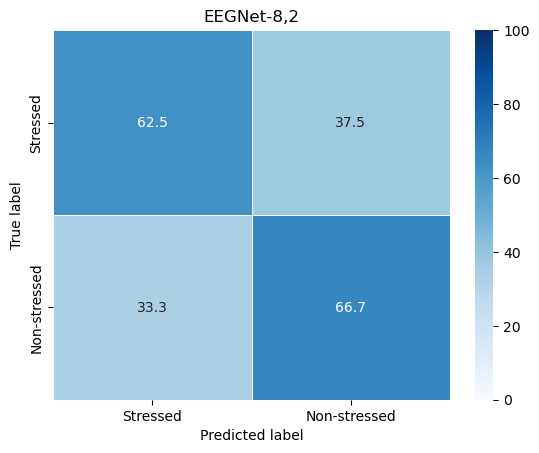

In [26]:
probs_Deep = EEGNet_DeepConvNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels)

In [30]:
print(probs_Deep)
preds_Deep = probs_Deep.argmax(axis = -1)  
print(preds_Deep)
print(test_labels.T)

performance_Deep = compute_metrics(test_labels, preds_Deep)
print(performance_Deep)

[[6.95184946e-01 3.04815054e-01]
 [4.21892613e-01 5.78107417e-01]
 [7.89708734e-01 2.10291266e-01]
 [9.99535143e-01 4.64851793e-04]
 [1.59405246e-01 8.40594828e-01]
 [9.02964830e-01 9.70351920e-02]
 [1.18944913e-01 8.81055117e-01]
 [1.71721101e-01 8.28278899e-01]
 [9.67139781e-01 3.28601785e-02]
 [7.46518612e-01 2.53481418e-01]
 [2.98798531e-01 7.01201379e-01]
 [1.78000614e-10 9.99999940e-01]
 [8.16536665e-01 1.83463335e-01]
 [2.43162528e-01 7.56837428e-01]
 [1.04919985e-01 8.95080090e-01]
 [9.93469775e-01 6.53020665e-03]
 [9.06261265e-01 9.37386826e-02]
 [6.60291553e-01 3.39708477e-01]
 [7.47849047e-01 2.52150923e-01]]
[0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0]
[[1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0]]

 Confusion matrix:
[[7 4]
 [4 4]]
[57.89 63.64 50.  ]


In [27]:
# init data, 300 epochs, softmax activation
probs_Deep_init_soft = np.array([[7.0045400e-01, 2.9954603e-01],
                            [7.8413427e-01, 2.1586572e-01],
                            [7.1874863e-01, 2.8125137e-01],
                            [9.9979991e-01, 2.0014797e-04],
                            [2.9218609e-02, 9.7078133e-01]
                            [9.9454159e-01, 5.4584546e-03],
                            [5.5008806e-02, 9.4499117e-01],
                            [9.6587259e-01, 3.4127403e-02],
                            [6.3271725e-01, 3.6728275e-01],
                            [9.8455411e-01, 1.5445878e-02],
                            [8.1000119e-01, 1.8999882e-01],
                            [9.9752015e-01, 2.4798173e-03],
                            [9.8586375e-01, 1.4136297e-02],
                            [4.3618846e-01, 5.6381154e-01],
                            [1.4959927e-01, 8.5040075e-01],
                            [9.5763546e-01, 4.2364582e-02],
                            [9.9997401e-01, 2.5972882e-05],
                            [9.9117404e-01, 8.8259308e-03],
                            [9.9719328e-01, 2.8067816e-03]])


probs_Deep_init_sigm = np.array([[6.95184946e-01 3.04815054e-01]
 [4.21892613e-01 5.78107417e-01]
 [7.89708734e-01 2.10291266e-01]
 [9.99535143e-01 4.64851793e-04]
 [1.59405246e-01 8.40594828e-01]
 [9.02964830e-01 9.70351920e-02]
 [1.18944913e-01 8.81055117e-01]
 [1.71721101e-01 8.28278899e-01]
 [9.67139781e-01 3.28601785e-02]
 [7.46518612e-01 2.53481418e-01]
 [2.98798531e-01 7.01201379e-01]
 [1.78000614e-10 9.99999940e-01]
 [8.16536665e-01 1.83463335e-01]
 [2.43162528e-01 7.56837428e-01]
 [1.04919985e-01 8.95080090e-01]
 [9.93469775e-01 6.53020665e-03]
 [9.06261265e-01 9.37386826e-02]
 [6.60291553e-01 3.39708477e-01]
 [7.47849047e-01 2.52150923e-01]]
[0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0]
[[1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0]])

<>:5: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:5: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
C:\Users\annej\AppData\Local\Temp\ipykernel_14032\2687471855.py:5: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [2.9218609e-02, 9.7078133e-01]


TypeError: list indices must be integers or slices, not tuple

Epoch 1/300

Epoch 1: val_loss improved from inf to 87.15217, saving model to /tmp\checkpoint.h5
2/2 - 11s - loss: 23.3107 - accuracy: 0.4773 - val_loss: 87.1522 - val_accuracy: 0.6250 - 11s/epoch - 6s/step
Epoch 2/300

Epoch 2: val_loss improved from 87.15217 to 41.84463, saving model to /tmp\checkpoint.h5
2/2 - 10s - loss: 170.6238 - accuracy: 0.6136 - val_loss: 41.8446 - val_accuracy: 0.6875 - 10s/epoch - 5s/step
Epoch 3/300

Epoch 3: val_loss did not improve from 41.84463
2/2 - 11s - loss: 58.7394 - accuracy: 0.5682 - val_loss: 65.2082 - val_accuracy: 0.4375 - 11s/epoch - 6s/step
Epoch 4/300

Epoch 4: val_loss improved from 41.84463 to 36.31944, saving model to /tmp\checkpoint.h5
2/2 - 11s - loss: 37.4983 - accuracy: 0.6364 - val_loss: 36.3194 - val_accuracy: 0.6875 - 11s/epoch - 6s/step
Epoch 5/300

Epoch 5: val_loss improved from 36.31944 to 16.31143, saving model to /tmp\checkpoint.h5
2/2 - 12s - loss: 23.7577 - accuracy: 0.6591 - val_loss: 16.3114 - val_accuracy: 0.4375 - 12s/e

1/1 [==============================] - 1s 1s/step
Classification accuracy: 0.529086 


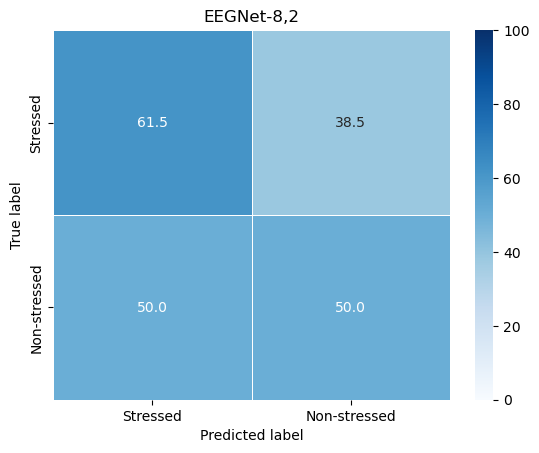

In [27]:
probs_Shallow = EEGNet_ShallowConvNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels)

In [28]:
print(probs_Shallow)
preds_Shallow = probs_Shallow.argmax(axis = -1)  
print(preds_Shallow)
print(test_labels.T)

performance_Shallow = compute_metrics(test_labels, preds_Shallow)
print(performance_Shallow)

[[9.9999946e-01 5.2360480e-07]
 [9.9920905e-01 7.9095934e-04]
 [3.1668501e-04 9.9968332e-01]
 [9.9958211e-01 4.1789180e-04]
 [1.0000000e+00 2.0106063e-12]
 [2.5430129e-15 1.0000000e+00]
 [4.5979065e-10 1.0000000e+00]
 [4.0611334e-04 9.9959385e-01]
 [2.0120059e-09 1.0000000e+00]
 [1.0000000e+00 1.1936473e-11]
 [9.9999958e-01 3.9360066e-07]
 [1.0000000e+00 4.5507523e-16]
 [1.0000000e+00 1.6772502e-13]
 [9.9999577e-01 4.2513248e-06]
 [9.9251729e-01 7.4824370e-03]
 [1.0000000e+00 1.4604005e-13]
 [2.5460558e-04 9.9974537e-01]
 [1.0000000e+00 2.3725112e-11]
 [9.6442640e-01 3.5573784e-02]]
[0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0]
[[1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0]]

 Confusion matrix:
[[8 3]
 [5 3]]
[57.89 61.54 50.  ]


In [ ]:
probs_Shallow_init_sigmoid = np.array([[6.95184946e-01 3.04815054e-01]
 [4.21892613e-01 5.78107417e-01]
 [7.89708734e-01 2.10291266e-01]
 [9.99535143e-01 4.64851793e-04]
 [1.59405246e-01 8.40594828e-01]
 [9.02964830e-01 9.70351920e-02]
 [1.18944913e-01 8.81055117e-01]
 [1.71721101e-01 8.28278899e-01]
 [9.67139781e-01 3.28601785e-02]
 [7.46518612e-01 2.53481418e-01]
 [2.98798531e-01 7.01201379e-01]
 [1.78000614e-10 9.99999940e-01]
 [8.16536665e-01 1.83463335e-01]
 [2.43162528e-01 7.56837428e-01]
 [1.04919985e-01 8.95080090e-01]
 [9.93469775e-01 6.53020665e-03]
 [9.06261265e-01 9.37386826e-02]
 [6.60291553e-01 3.39708477e-01]
 [7.47849047e-01 2.52150923e-01]]
[0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0]
[[1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0]])